## SVM (Support Vector Machine)

In [ ]:
# mglearn: 시각화도구
!pip install mglearn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC     # SVM import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import mglearn

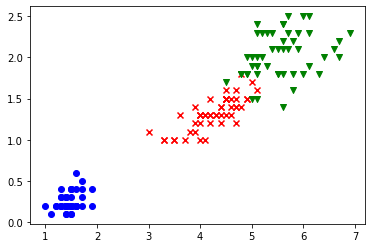

In [ ]:
# Iris 데이터 로드
iris = load_iris()

# 시각화를 위해 sepal length와 sepal width만 사용
x = iris.data[:, [2, 3]] # colume 0과 1만 사용함.
y = iris.target

df = pd.DataFrame(data= np.c_[x, y], columns= ['x', 'y', 'target'])

plt.scatter(df[df['target'] == 0.0]['x'], df[df['target'] == 0.0]['y'], marker='o', c='blue')
plt.scatter(df[df['target'] == 1.0]['x'], df[df['target'] == 1.0]['y'], marker='x', c='red')
plt.scatter(df[df['target'] == 2.0]['x'], df[df['target'] == 2.0]['y'], marker='v', c='green')
plt.show()


* 학습용 데이터로 측정한 정확도 = 0.95
* 시험용 데이터로 측정한 정확도 = 0.97


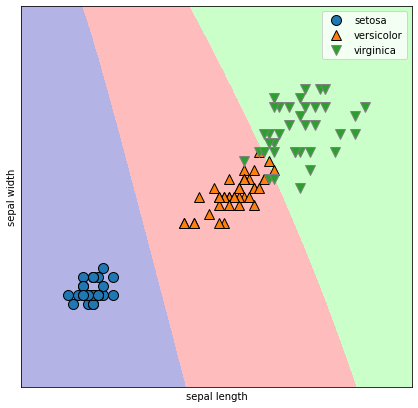

In [ ]:
# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# SVM으로 Train 데이터 세트를 학습
model = SVC(kernel='rbf', gamma=0.2, C=1.0)
model.fit(x_train, y_train)

# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
print()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % model.score(x_train, y_train))
print("* 시험용 데이터로 측정한 정확도 = %.2f" % model.score(x_test, y_test))

# 시각화
plt.figure(figsize=[7,7])
mglearn.plots.plot_2d_classification(model, x_train, alpha=0.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
# gamma와 C의 조합을 바꿔가면서 학습 데이터의 정확도가 최대인 조합을 찾는다
optAcc = -999
optG = 0
optC = 0
for gamma in np.arange(0.1, 5.0, 0.1):
    for c in np.arange(0.1, 5.0, 0.1):
        model = SVC(kernel='rbf', gamma=gamma, C=c)
        model.fit(x_train, y_train)
        acc = model.score(x_test, y_test)
        
        if acc > optAcc:
            optG = gamma
            optC = c
            optAcc = acc

print('optG = %.2f' % optG)
print('optC = %.2f' % optC)
print('optAcc = %.2f' % optAcc)

optG = 0.10
optC = 3.10
optAcc = 1.00



* 학습용 데이터로 측정한 정확도 = 0.96
* 시험용 데이터로 측정한 정확도 = 1.00


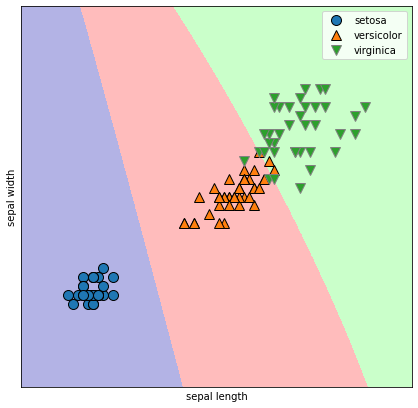

In [ ]:
# 최적 조건으로 다시 학습한다.
model = SVC(kernel='rbf', gamma=optG, C=optC)
model.fit(x_train, y_train)

# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
print()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % model.score(x_train, y_train))
print("* 시험용 데이터로 측정한 정확도 = %.2f" % model.score(x_test, y_test))

# 시각화
plt.figure(figsize=[7,7])
mglearn.plots.plot_2d_classification(model, x_train, alpha=0.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## SVR with California Housing Price Dataset

In [ ]:
# 이번에는 Regression 문제를 해결해보자 => SVR, DT regressor 비교
# 기존에 이용했던 Boston Housing dataset은 ethical problem이 있다고 하여
# California Housing Dataset으로 대체
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [ ]:
housing.data.shape, housing.target.shape

((20640, 8), (20640,))

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)  # housing.data == housing['data']
df['Price'] = housing.target
df.head()   # 총 20640개의 데이터

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# => 원래 모델 검증을 위해 validation 데이터를 사용함
# test 데이터는 일반화 성능을 검증하기 위해 사용하는 데이터

((16512, 8), (16512,), (4128, 8), (4128,))

In [ ]:
# DT regressor
max_depth = 20
DT = []
for i in range(1, max_depth+1):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(x_train, y_train)
    DT.append(dt.score(x_test, y_test))

# 최적의 depth
opt_depth = np.argmax(DT)+1

# 최적 depth로 모델링 후 훈련
dt = DecisionTreeRegressor(max_depth=opt_depth)
dt.fit(x_train, y_train)

# Regressor 문제에서 score 함수는 R2값을 리턴 (Classification은 정확도)
dt_R2 = dt.score(x_test, y_test)
print('Decision Tree Regressor:', dt_R2.round(4))

Decision Tree Regressor: 0.6943


In [ ]:
# SVR model 만들고 최적의 C값 찾기
svr_scores = []
for i in np.arange(0.1, 5.1, 0.1):  
    svr = SVR(kernel='linear', C=i)     # kernel: linear
    svr.fit(x_train, y_train)
    svr_score = svr.score(x_test, y_test)
    svr_scores.append(svr_score)

opt_c = (np.argmax(svr_scores)+1) *0.1

# 최적 C값으로 모델 만들고 훈련
svr = SVR(kernel='linear', C=opt_c)
svr.fit(x_train, y_train)

# SVR model의 R2 스코어 출력
svr_R2 = svr.score(x_test, y_test)
print('Support Vector Regressor:', svr_R2.round(4))

Support Vector Regressor: 0.5805
